In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset 
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#How many samples
df.shape

(303, 14)

In [4]:
#To check null value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#To check data type 
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
#check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#how statistical Operation
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


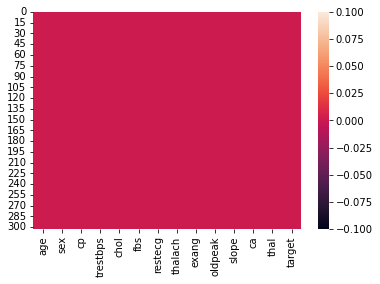

In [8]:
#visualise
sb.heatmap(df.isnull())
plt.show()

In [9]:
#To check duplicates
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
#To delete duplicate
df.drop_duplicates(inplace=True)

In [12]:
#check duplicates
df.duplicated().sum()

0

In [13]:
#check if Data is unbalanced
df['target'].value_counts() 

1    164
0    138
Name: target, dtype: int64

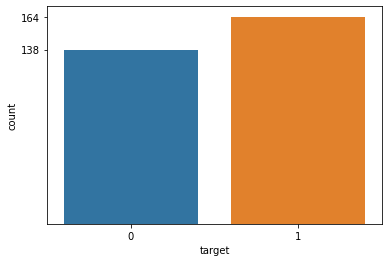

In [14]:
#visulisation if data is unbalanced
sb.countplot(data=df,x='target')
f=df['target'].value_counts()
plt.yticks(f)
plt.show()


In [15]:
#select input and output
X=df.drop("target",axis=1)
Y=df['target']

In [16]:
#split data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
#check shape of X_train,X_test
X_train.shape,X_test.shape

((211, 13), (91, 13))

In [18]:
#check shape of Y_train,Y_test
Y_train.shape,Y_test.shape

((211,), (91,))

In [19]:
#Apply scaling on input column 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [20]:
#create user defined function
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [21]:
#import classification_report and confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
#Train the model with LogisticsRegression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1)
lr=create_model(lr)


              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[30  8]
 [ 9 44]]


In [23]:
#Train the model with DecisionTreeClassifier algorithm with Gini index 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1)
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91

[[30  8]
 [16 37]]


In [24]:
#apply max_depth pruning technique on DecisionTreeClassifier with Gini index
for i in range(1,9):
    dtc_maxdepth=DecisionTreeClassifier(random_state=1,max_depth=i)
    print('Max Depth:',i)
    dtc_maxdepth=create_model(dtc_maxdepth)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        38
           1       0.77      0.68      0.72        53

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91

[[27 11]
 [17 36]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        

In [25]:
dtc_maxdepth=DecisionTreeClassifier(random_state=1,max_depth=3)
dtc_maxdepth=create_model(dtc_maxdepth)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

[[26 12]
 [12 41]]


In [26]:
#apply min_samples_leaf pruning technique on DecisionTreeClassifier with Gini index
for i in range(45,101):
    dtc_min_leaf=DecisionTreeClassifier(min_samples_leaf=i,random_state=1)
    print('Min_samples_leaf :',i)
    dtc_min_leaf=create_model(dtc_min_leaf)

Min_samples_leaf : 45
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min_samples_leaf : 46
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min_samples_leaf : 47
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70 

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min_samples_leaf : 93
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min_samples_leaf : 94
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70   

In [27]:
dtc_min_leaf=DecisionTreeClassifier(min_samples_leaf=45,random_state=1)
dtc_min_leaf=create_model(dtc_min_leaf)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


In [28]:
#Train the model with DecisionTreeClassifier algorithm with Entropy 
from sklearn.tree import DecisionTreeClassifier
dtc2=DecisionTreeClassifier(random_state=1,criterion='entropy')
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.72        91

[[28 10]
 [16 37]]


In [29]:
#apply max_depth pruning technique on DecisionTreeClassifier with Entropy
for i in range(1,9):
    dtc_maxdepth=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print('Max Depth:',i)
    dtc_maxdepth=create_model(dtc_maxdepth)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        38
           1       0.85      0.74      0.79        53

    accuracy                           0.77        91
   macro avg       0.77      0.78      0.77        

In [30]:
dtc_maxdepth=DecisionTreeClassifier(random_state=1,max_depth=6,criterion='entropy')
dtc_maxdepth=create_model(dtc_maxdepth)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[28 10]
 [13 40]]


In [31]:
#apply min_samples_leaf pruning technique on DecisionTreeClassifier with Gini index
for i in range(45,101):
    dtc_min_leaf=DecisionTreeClassifier(min_samples_leaf=i,random_state=1,criterion='entropy')
    print('Min_samples_leaf :',i)
    dtc_min_leaf=create_model(dtc_min_leaf)

Min_samples_leaf : 45
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min_samples_leaf : 46
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min_samples_leaf : 47
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70 

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min_samples_leaf : 94
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
Min_samples_leaf : 95
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70   

In [32]:
dtc_min_leaf=DecisionTreeClassifier(min_samples_leaf=45,random_state=1,criterion='entropy')
dtc_min_leaf=create_model(dtc_min_leaf)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


In [33]:
#train the model with RandomForestClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier
for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print('No. of tree:',i)
    rfc=create_model(rfc)

No. of tree: 10
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        38
           1       0.80      0.66      0.72        53

    accuracy                           0.70        91
   macro avg       0.71      0.71      0.70        91
weighted avg       0.72      0.70      0.71        91

[[29  9]
 [18 35]]
No. of tree: 11
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[28 10]
 [13 40]]
No. of tree: 12
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.7

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No. of tree: 34
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No. of tree: 35
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weig

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]
No. of tree: 58
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        38
           1       0.83      0.72      0.77        53

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91

[[30  8]
 [15 38]]
No. of tree: 59
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weig

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]
No. of tree: 82
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
No. of tree: 83
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weig

In [34]:
rfc=RandomForestClassifier(n_estimators=81,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]


In [35]:
#Apply max_depth pruning on RandomForestClassifier Algorithm
for i in range(1,9):
    rfc_max_depth=RandomForestClassifier(n_estimators=81,random_state=1,max_depth=i)
    print('Max depth :',i)
    rfc_max_depth=create_model(rfc_max_depth)

Max depth : 1
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]
Max depth : 2
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        38
           1       0.82      0.85      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91

[[28 10]
 [ 8 45]]
Max depth : 3
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.83      0.85      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81     

In [36]:
rfc_max_depth=RandomForestClassifier(n_estimators=81,random_state=1,max_depth=3)
rfc_max_depth=create_model(rfc_max_depth)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.83      0.85      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[29  9]
 [ 8 45]]


In [37]:
#Apply min_samples_leaf pruning on RandomForestClassifier Algorithm
for i in range(45,101):
    rfc_min_leaf=RandomForestClassifier(n_estimators=81,random_state=1,min_samples_leaf=i)
    print('Min_samples_leaf :',i)
    rfc_min_leaf=create_model(rfc_min_leaf)

Min_samples_leaf : 45
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29  9]
 [10 43]]
Min_samples_leaf : 46
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29  9]
 [10 43]]
Min_samples_leaf : 47
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79 

              precision    recall  f1-score   support

           0       0.69      0.47      0.56        38
           1       0.69      0.85      0.76        53

    accuracy                           0.69        91
   macro avg       0.69      0.66      0.66        91
weighted avg       0.69      0.69      0.68        91

[[18 20]
 [ 8 45]]
Min_samples_leaf : 69
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37        91
weighted avg       0.34      0.58      0.43        91

[[ 0 38]
 [ 0 53]]
Min_samples_leaf : 70
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37   

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37        91
weighted avg       0.34      0.58      0.43        91

[[ 0 38]
 [ 0 53]]
Min_samples_leaf : 92
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37        91
weighted avg       0.34      0.58      0.43        91

[[ 0 38]
 [ 0 53]]
Min_samples_leaf : 93
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.58      1.00      0.74        53

    accuracy                           0.58        91
   macro avg       0.29      0.50      0.37   

In [39]:
rfc_min_leaf=RandomForestClassifier(n_estimators=81,random_state=1,min_samples_leaf=45)
rfc_min_leaf=create_model(rfc_min_leaf)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29  9]
 [10 43]]


In [40]:
#Apply ADABoostClassifier
from sklearn.ensemble import AdaBoostClassifier

for i in range(1,20):
    abc=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('No of Decision stumps:',i)
    abc=create_model(abc)

No of Decision stumps: 1
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]
No of Decision stumps: 2
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        38
           1       0.88      0.55      0.67        53

    accuracy                           0.69        91
   macro avg       0.73      0.72      0.69        91
weighted avg       0.76      0.69      0.69        91

[[34  4]
 [24 29]]
No of Decision stumps: 3
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.82      0.79      0.81        53

    accuracy                           0.78        91
   macro avg   

In [41]:
abc=AdaBoostClassifier(n_estimators=14,random_state=1)
abc=create_model(abc)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.88      0.81      0.84        53

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.83        91

[[32  6]
 [10 43]]


In [43]:
#Apply GradientBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

for i in range(10,101):
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('No of decision tree:',i)
    gbc=create_model(gbc)

No of decision tree: 10
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]
No of decision tree: 11
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]
No of decision tree: 12
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.80      0.77      0.79        53

    accuracy                           0.76        91
   macro avg      

              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
No of decision tree: 38
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
No of decision tree: 39
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.7

              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.73      0.71      0.72        91

[[29  9]
 [17 36]]
No of decision tree: 61
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        38
           1       0.80      0.70      0.75        53

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.74      0.73      0.73        91

[[29  9]
 [16 37]]
No of decision tree: 62
              precision    recall  f1-score   support

           0       0.62      0.74      0.67        38
           1       0.78      0.68      0.73        53

    accuracy                           0.70        91
   macro avg       0.70      0.71      0.7

              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.73      0.71      0.72        91

[[29  9]
 [17 36]]
No of decision tree: 86
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.73      0.71      0.72        91

[[29  9]
 [17 36]]
No of decision tree: 87
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.7

In [44]:
gbc=GradientBoostingClassifier(n_estimators=11,random_state=1)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]


In [69]:
#Apply XtremeGradientBoostClassifier
from xgboost import XGBClassifier

for i in range(10,101):
    xgbc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1,)
    print('No of decision tree:',i)
    xgbc=create_model(xgbc)

No of decision tree: 10
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]
No of decision tree: 11
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[29  9]
 [14 39]]
No of decision tree: 12
              precision    recall  f1-score   support

           0       0.67      0.76      0.72        38
           1       0.81      0.74      0.77        53

    accuracy                           0.75        91
   macro avg      

[[28 10]
 [14 39]]
No of decision tree: 37
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No of decision tree: 38
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91

[[28 10]
 [14 39]]
No of decision tree: 39
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        38
           1       0.80      0.74      0.76        53

    accuracy                           0.74        91

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No of decision tree: 62
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No of decision tree: 63
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.7

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No of decision tree: 85
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

[[27 11]
 [14 39]]
No of decision tree: 86
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.78      0.74      0.76        53

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.7

In [73]:
xgbc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
xgbc=create_model(xgbc)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.82      0.77      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

[[29  9]
 [12 41]]


In [72]:
#Apply Support Vector Machine algorithm with hard margin
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [68]:
#Apply Support Vector Machine algorithm with soft margin
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1,C=0.9)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [54]:
#No improvent in recall score, means data is non linear 
#Apply Support Vector Machine algorithm for non linear data with polynomial kernel function
from sklearn.svm import SVC
poly_svc=SVC(random_state=1,kernel='poly')
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.84      0.87      0.85        53

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

[[29  9]
 [ 7 46]]


In [55]:
#Apply Support Vector Machine algorithm for non linear data with radial basis kernel function
r_svc=SVC(random_state=1,kernel='rbf')
r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]


In [60]:
#Apply KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.84      0.81      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[30  8]
 [10 43]]


In [74]:
dict={'Algorithm':['Logostic Regression','DTC_G_max','DTC_G_min','DTC_E_max','DTC_G_min','RFC_max','RFC_min','ADA','GBC','XGB',
                   'SVC_poly','SVC_r','KNN'],
     'Recall 0':[79,68,68,74,68,76,76,84,74,76,76,74,79],
     'Recall 1':[83,77,72,75,72,85,81,81,81,77,87,79,81]}
df1=pd.DataFrame(dict)
df1.sort_values('Recall 1',ascending=False)

,Algorithm,Recall 0,Recall 1
10,SVC_poly,76,87
5,RFC_max,76,85
0,Logostic Regression,79,83
6,RFC_min,76,81
7,ADA,84,81
8,GBC,74,81
12,KNN,79,81
11,SVC_r,74,79
1,DTC_G_max,68,77
9,XGB,76,77
